In [1]:
#FINALPROJECT-->1
import pandas as pd
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")

Below is the table containing the information of Customer price index, discounts, offers where the organization
wants to predict the sales based on the cpi, discounts,offers.

Given below information find out the Sales that has

5000 cpi , 3 percentage discounts, 20 rewards offers

4000 cpi , 8 percentage discounts, 19 rewards offers

In [4]:
df = pd.read_excel("Data set.xlsx")
df
#1 dependent and 3 independent variables --> multiple linear regression(PREDICTION)

,CPI,discounts,offers,Sales
0,2600,3,20,550000
1,3000,4,15,565000
2,3200,5,18,610000
3,3600,3,30,595000
4,4000,5,8,760000
5,4100,6,8,810000


In [4]:
df.columns

Index(['CPI', 'discounts', 'offers', 'Sales'], dtype='object')

In [5]:
#x = CPI,discounts,offers
x = df[['CPI', 'discounts', 'offers']]
x

,CPI,discounts,offers
0,2600,3,20
1,3000,4,15
2,3200,5,18
3,3600,3,30
4,4000,5,8
5,4100,6,8


In [6]:
x.corr()

,CPI,discounts,offers
CPI,1.000000,0.664772,-0.445300
discounts,0.664772,1.000000,-0.816902
offers,-0.445300,-0.816902,1.000000


In [7]:
#y = sales
y = df["Sales"]
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: Sales, dtype: int64

In [8]:
#LINEAR MODEL
reg = linear_model.LinearRegression()
reg.fit(x,y) #fitting the model

LinearRegression()

In [9]:
#finding co_efficient
reg.coef_

array([  128.43512778,  5913.51964731, -4902.54602054])

In [10]:
#finding intercept
reg.intercept_

264780.07095467113

In [11]:
#5000 cpi , 3 percentage discounts, 20 rewards offers
reg.predict([[5000,3,20]]) #predicting the values

array([826645.34838222])

In [12]:
# 4000 cpi , 8 percentage discounts, 19 rewards offers
reg.predict([[4000,8,19]])

array([732680.36486005])

In [18]:
#STATSMODEL
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols(formula="Sales ~ CPI+discounts+offers", data=df)
res = model1.fit()
print(res.summary())
#manually predict the values by substituting co-eff and intercept in formula

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     13.14
Date:                Sun, 14 Jan 2024   Prob (F-statistic):             0.0716
Time:                        18:02:35   Log-Likelihood:                -68.476
No. Observations:                   6   AIC:                             145.0
Df Residuals:                       2   BIC:                             144.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.648e+05   1.64e+05      1.613      0.2

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [19]:
#manual calculation
#intercept+m1*x1+m2*x2+m3*x3
#5000 cpi , 3 percentage discounts, 20 rewards offers
264780.07095467113+(128.4351*5000)+(5913.5196*3)+(-4902.5460*20)

826645.2097546711

In [20]:
# 4000 cpi , 8 percentage discounts, 19 rewards offers
264780.07095467113+(128.4351*4000)+(5913.5196*8)+(-4902.5460*19)

732680.2537546712

###  FINALPROJECT-->2
2.Below table contains the bank details of customer – need to predict the how we can offer loan to customer based
  on the cybill score, Age, insurance, debit card , cards.

In [3]:
data = pd.read_excel("finalpro_2_data.xlsx")
data.head()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
0,5,0.0,1.0,0.0,50.0,34.940,0
1,3,1.0,0.0,0.0,18.0,0.891,1
2,66,0.0,1.0,0.0,5.0,0.330,1
3,70,0.0,1.0,1.0,31.0,0.037,0
4,96,0.0,1.0,0.0,30.0,0.038,1


In [4]:
data.columns

Index(['Cutomer id', 'Cards', 'Debit card', 'Insurance', 'Age', 'Cibil Score',
       'Loan offer'],
      dtype='object')

In [5]:
data.isnull().sum()

Cutomer id       0
Cards           12
Debit card      41
Insurance       48
Age            189
Cibil Score      0
Loan offer       0
dtype: int64

In [6]:
data1 = (data.isnull().sum()/len(data))*100
data1

Cutomer id      0.000000
Cards           0.895522
Debit card      3.059701
Insurance       3.582090
Age            14.104478
Cibil Score     0.000000
Loan offer      0.000000
dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

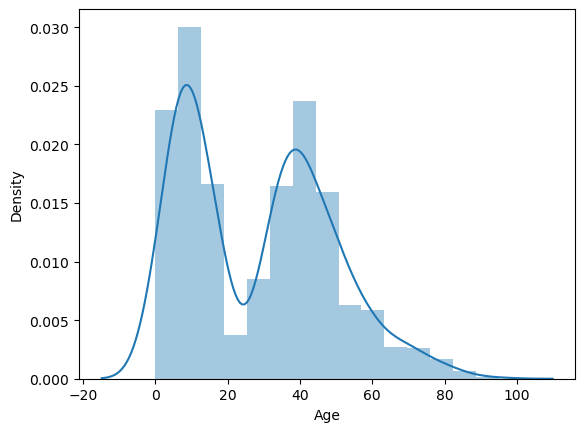

In [7]:
import seaborn as sns
sns.distplot(data["Age"])

In [8]:
#null value treatment --> filling mean(age)
data["Age"]= data["Age"].fillna(data["Age"].mode()[0])

In [9]:
#filling mode
data["Insurance"] = data["Insurance"].fillna(data["Insurance"].mode()[0])

In [10]:
#filling mode(Debit card)
data["Debit card"] = data["Debit card"].fillna(data["Debit card"].mode()[0])

In [11]:
#filling 
data["Cards"] = data["Cards"].bfill()

In [12]:
data.isnull().sum()

Cutomer id     0
Cards          0
Debit card     0
Insurance      0
Age            0
Cibil Score    0
Loan offer     0
dtype: int64

In [13]:
data.corr()

,Cutomer id,Cards,Debit card,Insurance,Age,Cibil Score,Loan offer
Cutomer id,1.000000,0.027025,0.042214,-0.009150,-0.003003,-0.049590,0.011717
Cards,0.027025,1.000000,0.064525,-0.015735,-0.013066,-0.027607,0.077924
Debit card,0.042214,0.064525,1.000000,0.019953,0.030389,0.004641,0.076631
Insurance,-0.009150,-0.015735,0.019953,1.000000,-0.018020,0.111879,-0.055848
Age,-0.003003,-0.013066,0.030389,-0.018020,1.000000,0.051575,-0.016396
Cibil Score,-0.049590,-0.027607,0.004641,0.111879,0.051575,1.000000,-0.219715
Loan offer,0.011717,0.077924,0.076631,-0.055848,-0.016396,-0.219715,1.000000


In [15]:
X = data[['Cards', 'Debit card', 'Insurance', 'Age', 'Cibil Score']]
X.head()

,Cards,Debit card,Insurance,Age,Cibil Score
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [16]:
Y = data["Loan offer"]
Y.head()

0    0
1    1
2    1
3    0
4    1
Name: Loan offer, dtype: int64

In [17]:
#TRAIN TEST SPLIT
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20,random_state=42)
len(X_train),len(Y_test),len(Y_train),len(Y_test)

(1072, 268, 1072, 268)

In [19]:
#USING LINEAR MODEL
#Define Logistic regression and fit the model
Lreg = LogisticRegression()
Lreg.fit(X_train,Y_train.ravel())

Y_predict = Lreg.predict(X_test)
Y_predict

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [20]:
Lreg.score(X_test,Y_test)

0.7425373134328358

In [21]:
#checking accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

score = accuracy_score(Y_test,Y_predict)
score

0.7425373134328358

In [22]:
confusion_matrix(Y_test,Y_predict)

array([[ 86,  42],
       [ 27, 113]], dtype=int64)

In [23]:
tp,fp,fn,tn = confusion_matrix(Y_test,Y_predict).ravel()
tp,fp,fn,tn

(86, 42, 27, 113)

In [24]:
print(classification_report(Y_test,Y_predict))
#precision - TP
#recall - TN
#f1- avg of precision and recall

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       128
           1       0.73      0.81      0.77       140

    accuracy                           0.74       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.74      0.74      0.74       268



In [31]:
Accuracy = (tp+tn) / (tp+tn+fp+fn)
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)

In [32]:
Accuracy,specificity,sensitivity,recall,precision

(0.7425373134328358,
 0.7290322580645161,
 0.7610619469026548,
 0.7610619469026548,
 0.671875)

In [33]:
import statsmodels.api as sm
X = sm.add_constant(X)
logit = sm.Logit(Y_train, X_train)
result = logit.fit()
(result.summary(X))

Optimization terminated successfully.
         Current function value: 0.587002
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                                                                                                                                                                                                                                                                                                                                            Logit Regression Results                                                                                                                                                                                                                                                                                                                                                                                                            
================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================
Dep. Variable:           const  Cards  Debit card  Insurance   Age  Cibil Score
0       1.0    0.0         1.0        0.0  50.0       34.940
1       1.0    1.0         0.0        0.0  18.0        0.891
2       1.0    0.0         1.0        0.0   5.0        0.330
3       1.0    0.0         1.0        1.0  31.0        0.037
4       1.0    0.0         1.0        0.0  30.0        0.038
...     ...    ...         ...        ...   ...          ...
1335    1.0    0.0         1.0        0.0  10.0        0.576
1336    1.0    1.0         1.0        0.0  46.0        3.705
1337    1.0    1.0         1.0        0.0  39.0        0.099
1338    1.0    1.0         0.0        0.0   8.0        3.177
1339    1.0    1.0         1.0        0.0  30.0        0.688

[1340 rows x 6 columns]   No. Observations:                 1072
Model:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Logit   Df Residuals:                     1067
Method:                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [34]:
Y_pred_probs = result.predict(X_test)

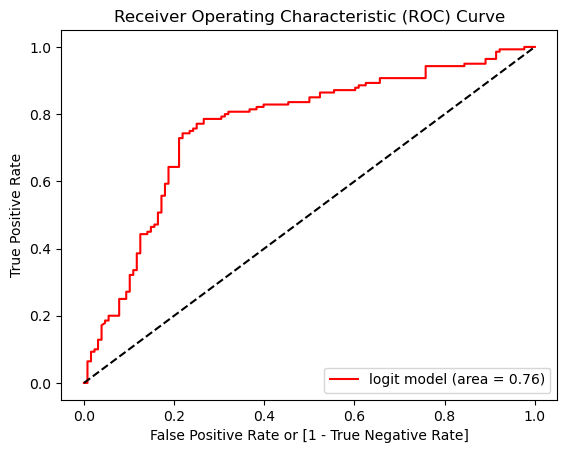

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Assuming Y is the true labels and classifier is your logistic regression model
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_probs)

# Calculate AUC using roc_auc_score
auc = roc_auc_score(Y_test, Y_pred_probs)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [43]:
auc

0.7647042410714286